In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')

In [4]:
df =pd.read_csv('/content/drive/MyDrive/Project II/data/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
sent_freq = df['review'].apply(lambda x: len(str(x).split(" ")))
sent_freq.describe()

count    50000.000000
mean       231.145940
std        171.326419
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [9]:
word_tokens_freq = df['review'].str.split(expand=True).stack().value_counts()
word_tokens_freq.describe()

count    438729.000000
mean         26.343932
std        1445.258309
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      568735.000000
dtype: float64

Text(0.5, 1.0, 'Sentiment distribution')

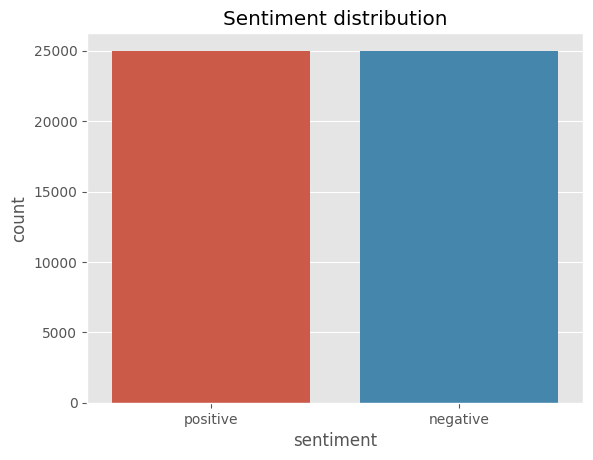

In [10]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment distribution')

In [11]:
for i in range(10):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [12]:
df['word count'] = df['review'].apply(lambda x: len(str(x).split(" ")))
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


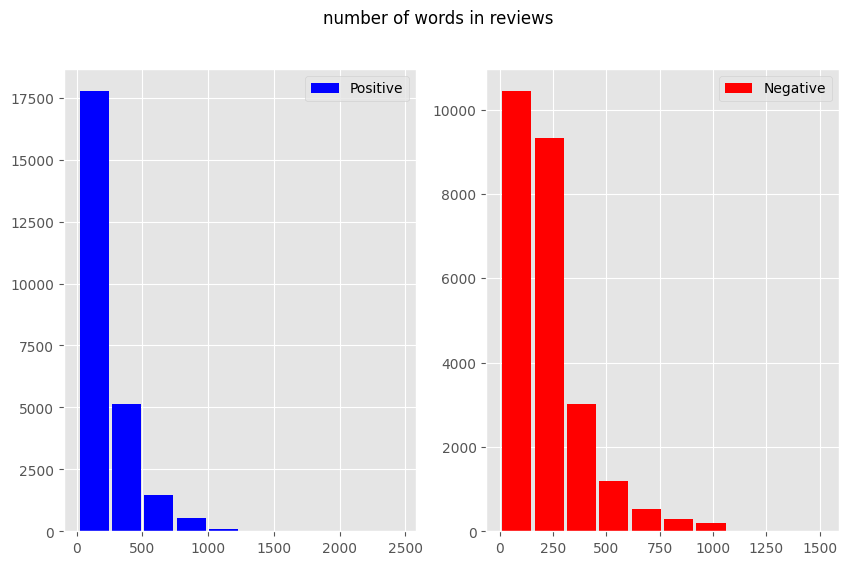

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.split().apply(lambda x: len(x)),
           label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.split().apply(lambda x: len(x)),
           label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("number of words in reviews")
plt.show()


In [14]:
pos_reviews = df[df['sentiment'] == 'positive']
pos_reviews.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
5,"Probably my all-time favorite movie, a story o...",positive,119


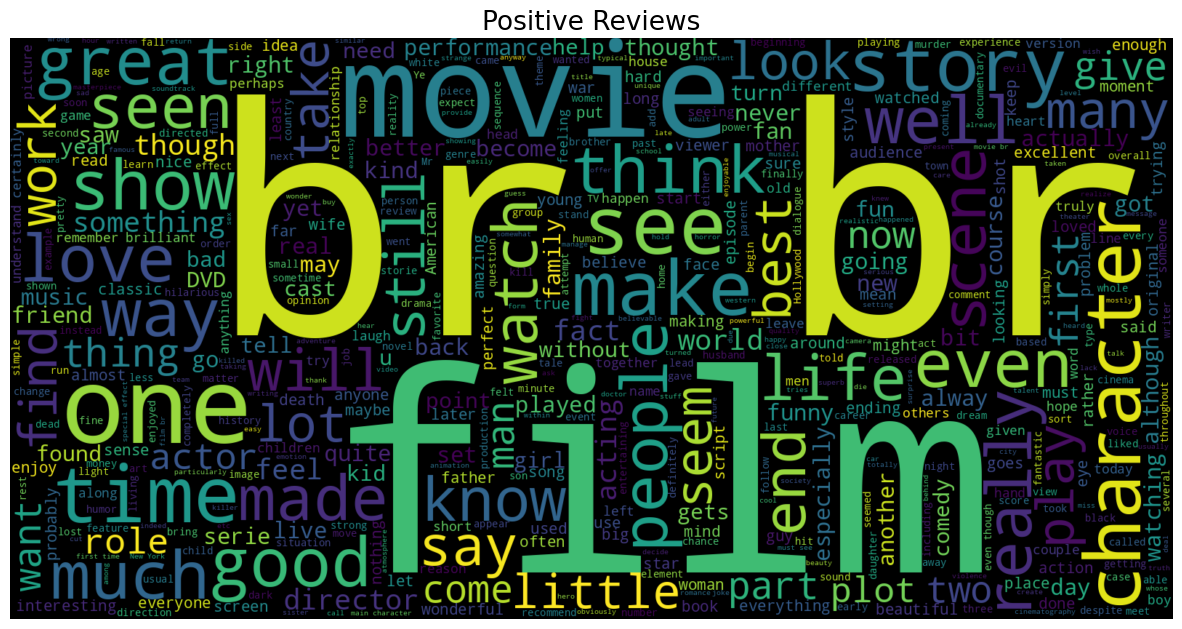

In [15]:
text = " ".join(review for review in pos_reviews.review)
plt.figure(figsize=(15, 10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews", fontsize=19)
plt.show()


In [ ]:
word_pos_tokens_freq = pos_reviews['review'].str.split(expand=True).stack().value_counts()
word_pos_tokens_freq[:20]

the      291927
and      165943
a        155775
of       149178
to       128343
is       108168
in        90427
that      62449
I         62223
it        53378
this      51614
/><br     48976
as        46574
with      43291
was       42155
for       41076
The       32911
but       32342
his       31695
on        30605
dtype: int64

In [ ]:
px.bar(word_pos_tokens_freq[:20], x=word_pos_tokens_freq[:20].values, y=word_pos_tokens_freq[:20].index,
         title='Most commom words in positive reviews', color=word_pos_tokens_freq[:20].index)

In [ ]:
neg_reviews = df[df['sentiment'] == 'negative']
neg_reviews.head()

,review,sentiment,word count
3,Basically there's a family where a little boy ...,negative,138
7,"This show was an amazing, fresh & innovative i...",negative,174
8,Encouraged by the positive comments about this...,negative,130
10,Phil the Alien is one of those quirky films wh...,negative,96
11,I saw this movie when I was about 12 when it c...,negative,180


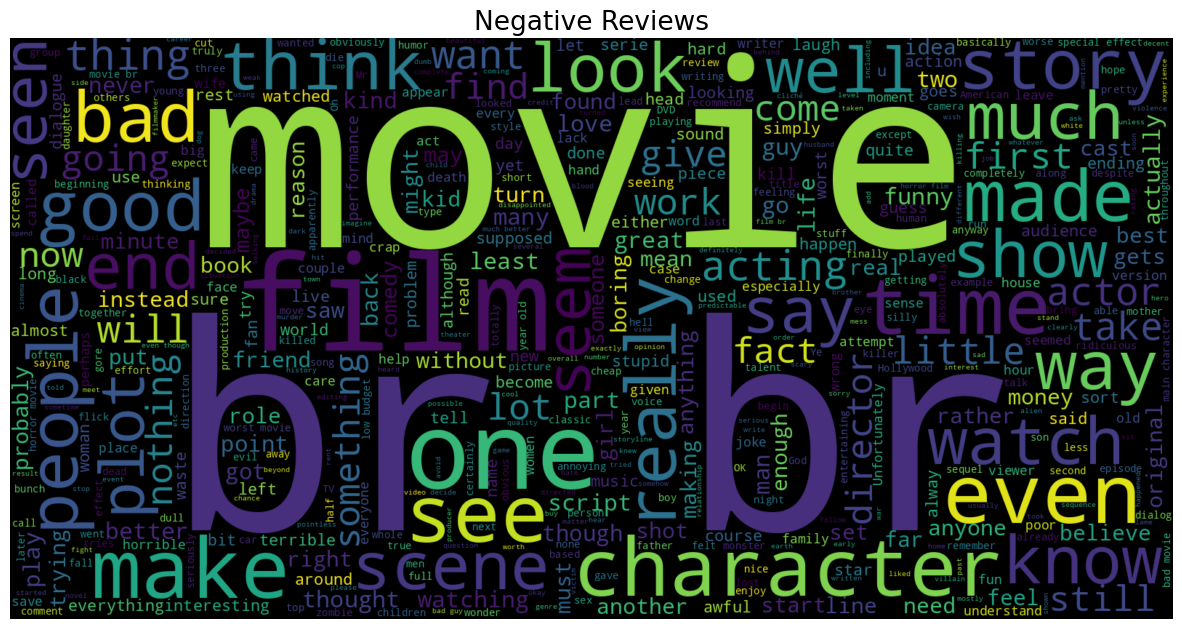

In [ ]:
text = " ".join(review for review in neg_reviews.review)
plt.figure(figsize=(15, 10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews", fontsize=19)
plt.show()

In [ ]:
word_neg_tokens_freq = neg_reviews['review'].str.split(expand=True).stack().value_counts()
word_neg_tokens_freq[:20]

In [ ]:
px.bar(word_neg_tokens_freq[:20], x=word_neg_tokens_freq[:20].values, y=word_neg_tokens_freq[:20].index,
            title='Most commom words in negative reviews', color=word_neg_tokens_freq[:20].index)